# ML with sklearn

**CS 4375 - Intro to Machine Learning**

**Dr. Karen Mazidi**

**Prepare by Leo Nguyen - ldn190002**

### Instruction 1 - Read the Auto data

Read in cvs file using panda.

In [1]:
import pandas as pd
df = pd.read_csv('Auto.csv')

Display first few fows and the dimension

In [2]:
print(df.head())
print('\nDimensions of data frame:', df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dimensions of data frame: (392, 9)


### Instruction 2 - Data exploration with code

Use describe() on mpg, weight, and year

    - mpg have range from 9 to 46.6 and average 23.445918
    - weight have range from 1613 to 5140 and average 2977.584184
    - year have range from 70 to 82 and average 76.010256
    

In [3]:
df.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [4]:
df.weight.describe()

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

In [5]:
df.year.describe()

count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64

### Instruction 3 - Explore data types

Check data types of all columns

In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

Change the cylinders column to categorical (use cat.codes)

The cat.codes will convert cylinders to categorical data type with numeric factor codes.

In [7]:
df.cylinders = df.cylinders.astype('category').cat.codes
print('\nNew data type of cylinder:', df.cylinders.dtypes)


New data type of cylinder: int8


Change the origin column to categorical (don't use cat.codes)

In [8]:
df.origin = df.origin.astype('category')
print('\nNew data type of origin:', df.origin.dtypes)


New data type of origin: category


### Instruction 4 - Deal with NAs

Check for NAs in each column

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

Delete rows with NAs. And output the new dimension

In [10]:
df = df.dropna()
print('\nDimensions of data frame:', df.shape)


Dimensions of data frame: (389, 9)


### Instrution 5 - Modify columns

Make a new column, mpg_high, and make it categorical. The column == 1 if mpg > average mpg, else == 0

In [11]:
import numpy as np

df['mpg_high'] = np.where(df.mpg > np.mean(df.mpg), 1, 0)
df.mpg_high = df.mpg_high.astype('category')

Delete the mpg and name columns (Delete mpg so the algorithm doesn’t just learn to predict mpg_high from mpg)

In [12]:
df = df.drop(columns=['mpg', 'name'])

Output the first few rows of the modified data frame

In [13]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


### Instrution 6 - Data exploration with graphs

Seaborn catplot on the mpg_high column

    - Based on the graph, we can see that, we have less cars with high mpg (mpg_high = 1) than the cars with low mpg (mpg_high = 0)

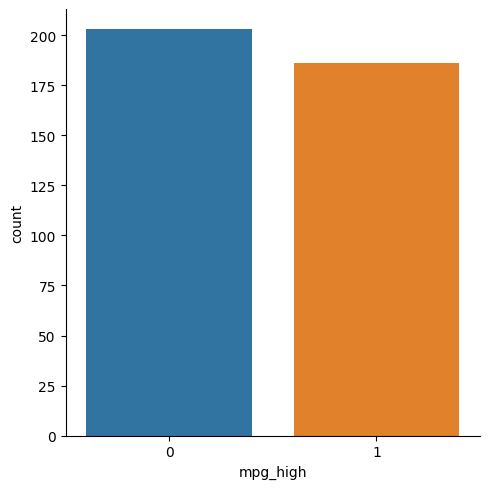

In [14]:
import seaborn as sb

sb.catplot(data=df, x="mpg_high", kind='count')

Seaborn relplot with horsepower on the x axis, weight on the y axis, setting hue or style to mpg_high

    - Based on the graph, we can see that most of the cars with high mpg ((mpg_high = 1) will have less weight and less horsepower than the cars with low mpg (mpg_high = 0)

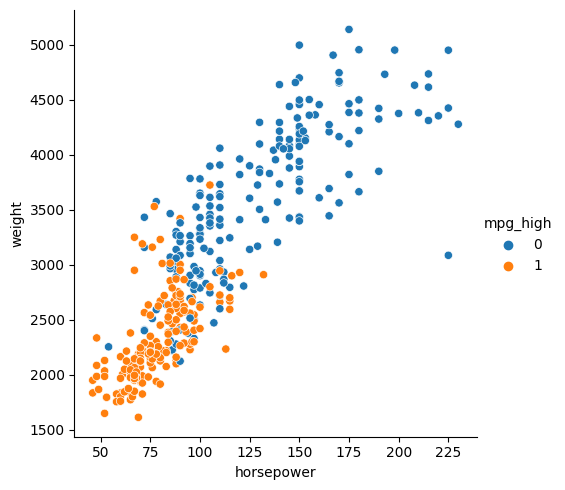

In [15]:
sb.relplot(data=df, x="horsepower", y="weight", hue="mpg_high")

Seaborn boxplot with mpg_high on the x axis and weight on the y axis

    - Based the graph, we can see that the group of cars with high mpg (mpg_high = 1) has smaller weight range compare to group of cars with low mpg (mpg_high = 0)

<AxesSubplot:xlabel='mpg_high', ylabel='weight'>

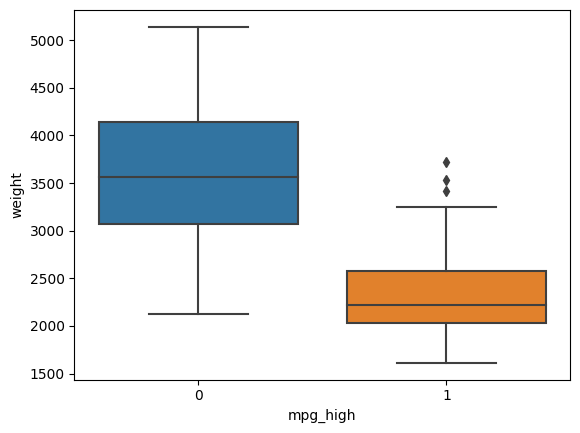

In [16]:
sb.boxplot(data=df, x="mpg_high", y="weight")

### Instrution 7 - Train/test split

Divide data into train/test (80/20) using seed 1234 to get the same result.

Train /test X data frames consists of all remaining columns except mpg_high

Output the dimensions of train and test


In [17]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'mpg_high']  # Predictor: All columns except mpg_high
y = df.mpg_high  # Target: mpg_high

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (311, 7)
test size: (78, 7)


### Instrution 8 - Logistic Regression

Train a logistic regression model using solver lbfgs

    - Set max_iter = 350 to cover the number of rows in train data which have 311 samples

In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', max_iter=350)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=350)

Test and Evaluate

**Test**

In [19]:
# make predictions

pred = clf.predict(X_test)

**Evaluate**


- precision_score:

    - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

    - The best value is 1 and the worst value is 0.
    
    
- recall_score: 

    - The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

    - The best value is 1 and the worst value is 0.
    
 
- f1_score: also known as balanced F-score or F-measure.

    - The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

    - F1 = 2 * (precision * recall) / (precision + recall)

    - In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.
 

In [20]:
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred))
print('recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

accuracy score:  0.8974358974358975
precision score:  0.7777777777777778
recall score:  1.0
f1 score:  0.8750000000000001


Print metrics using the classification report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.78      1.00      0.88        28

    accuracy                           0.90        78
   macro avg       0.89      0.92      0.89        78
weighted avg       0.92      0.90      0.90        78



### Instrution 9 - Decision Tree

Train a decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Test and Evaluate

**Test**

In [23]:
# make predictions

pred = clf.predict(X_test)

**Evaluate**

In [24]:
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred))
print('recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

accuracy score:  0.8974358974358975
precision score:  0.8571428571428571
recall score:  0.8571428571428571
f1 score:  0.8571428571428571


Print metrics using the classification report

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        50
           1       0.86      0.86      0.86        28

    accuracy                           0.90        78
   macro avg       0.89      0.89      0.89        78
weighted avg       0.90      0.90      0.90        78



Plot the tree

[Text(0.6507352941176471, 0.9444444444444444, 'X[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4338235294117647, 0.8333333333333334, 'X[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.27941176470588236, 0.7222222222222222, 'X[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.14705882352941177, 0.6111111111111112, 'X[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.058823529411764705, 0.5, 'X[4] <= 13.75\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08823529411764706, 0.3888888888888889, 'X[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.058823529411764705, 0.2777777777777778, 'X[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.029411764705882353, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08823529411764706, 0.16666666666666666, 'X

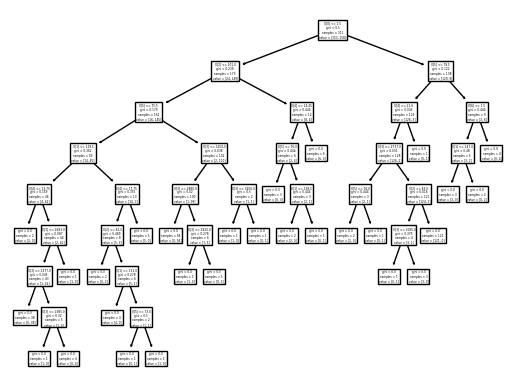

In [26]:
from sklearn import tree
tree.plot_tree(clf)

### Instrution 10 - Neural Network

First we need to normalize the data for training

In [27]:
# normalize the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train a neural network with network topology: 2 hidden layers: First layers: 3 nodes and Second layer: 2 nodes**

In [28]:
# train 
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, 2), max_iter=500, random_state=1234)
clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=500, random_state=1234,
              solver='lbfgs')

Test and Evaluate

**Test**

In [29]:
# make predictions

pred = clf.predict(X_test_scaled)

**Evaluation**

In [30]:
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred))
print('recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

accuracy score:  0.8717948717948718
precision score:  0.8
recall score:  0.8571428571428571
f1 score:  0.8275862068965518


**Train a neural network with network topology: 1 hidden layers with 5 nodes**

In [31]:
# train 
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(5), max_iter=1000, random_state=1234)
clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=1234,
              solver='sgd')

Test and Evaluate

**Test**

In [32]:
# make predictions

pred = clf.predict(X_test_scaled)

**Evaluation**

In [33]:
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred))
print('recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

accuracy score:  0.8589743589743589
precision score:  0.7575757575757576
recall score:  0.8928571428571429
f1 score:  0.819672131147541


#### Comparing 2 Neural Network Model

The first model with 2 hidens layers (3,2) have better result from the second model with 1 layer (5). Eventhough, both model have 5 nodes with follow the Rule of Thumbs. However, the first model have more layer compare to the second model, so it can capture more complex relationships in the data. That is the reason the first model have higher accuracy compare to second model.

Rule of Thumbs: Number of node should follow this rule:

    - Between 1 and number of predictors
    - 2/3 of input layer plus the size of output layer
    - < twice input layer
    
Follow these rules: The Auto data have 7 predictors. The suggesstion are: (1) 1-7, (2) 5, and (3) 14. So we try 5 hidens nodes and arrange them in 2 model as above.

### Instrution 11 - Analysis

The Logistic Regression and Decision Tree perform better compare to the Neural Network. Between the Neural Network, the first model (2 hidden layer) perform better compare to Second model (1 hidden layer). The Logistic Regression and Decision Tree have a highest accucary and very similar to each other. The Decsion Tree seem to have better value to predict the position sample because it have higher recall score. The Neural Network has the lowest accuracy. But the precission score and recall score are similar to Logistic Regression and Decision Tree.  Between 2 Neural Model, be First one have better accuracy because the have more player than the Second one. 

The Logistic Regressiona and Decision Tree perform better than Neural Network because we have a very small data set (< 500 samples). However, in the long run, when the data size grow, the Neural Network will out perfom these two.

My experiences when using both R and sklearn is they are very similar based on how to read data, build the model, test and evaluate results. Even the graph is also very similar. If i must to choose which one is better, i think sklearn is more flexable and more friendly to use other than R.